In [16]:
import math
import random
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.utils.class_weight
from sklearn import svm,tree
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
import pandas as pd
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTEENN
import seaborn as sns
from tabulate import tabulate

In [45]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig("c_matrix.jpg")
    return ax

Prepare the dataset


In [393]:
dataset=pd.read_csv("train_set.tsv",sep='\t',header=0)

#print(dataset["num_collisions"].value_counts(normalize=False))

X=dataset.iloc[:,:-2]  # : all raws :-2 slice out the last 2 columns
y=dataset.iloc[:,-2]   #just the last column

#normalized_df=(dataset-dataset.mean())/dataset.std()
Stdscaler = preprocessing.StandardScaler().fit(X)
X= Stdscaler.transform(X)
#X=(X-X.min())/(X.max()-X.min())  #between 0 and 1 (is column-wise)
#print(X.describe)
#print(X.std())
random_state=10
d={
   2:100,
   3:50
}
smote=SMOTE(sampling_strategy=d,k_neighbors=4)
#smote=SMOTEENN(smote=smote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=random_state) #to be reproducible
X_train,y_train=smote.fit_resample(X_train,y_train)
print("train-set composition: ",y_train.value_counts(normalize=False))
print("test-set composition: ",y_test.value_counts(normalize=False))

#PLOT THE TABLE WITH DATASET COMPOSITION
data = [["class 0", 538], 
        ["class 1", 333], 
        ["class 2", 96], 
        ["class 3", 30],
        ["class 4",3]
        ]
  
#define header names
col_names = ["class", "composition"]
  
#display table
print(tabulate(data, headers=col_names,tablefmt="fancy_grid"))



print("Number of training samples: %d" %(X_train.shape[0]))
print("Number of test samples: %d" %(X_test.shape[0]))


train-set composition:  0    434
1    263
2    100
3     50
4      2
Name: num_collisions, dtype: int64
test-set composition:  0    104
1     70
2     22
3      3
4      1
Name: num_collisions, dtype: int64
╒═════════╤═══════════════╕
│ class   │   composition │
╞═════════╪═══════════════╡
│ class 0 │           538 │
├─────────┼───────────────┤
│ class 1 │           333 │
├─────────┼───────────────┤
│ class 2 │            96 │
├─────────┼───────────────┤
│ class 3 │            30 │
├─────────┼───────────────┤
│ class 4 │             3 │
╘═════════╧═══════════════╛
Number of training samples: 849
Number of test samples: 200


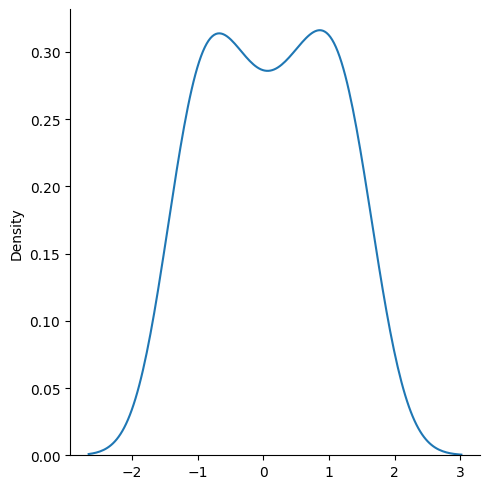

In [304]:
sns.displot(X[24],kind='kde')

GaussianNB

Input shape reduced train: (849, 2)
Input shape reduced test: (200, 2)


Text(0.5, 1.0, 'Training and test samples')

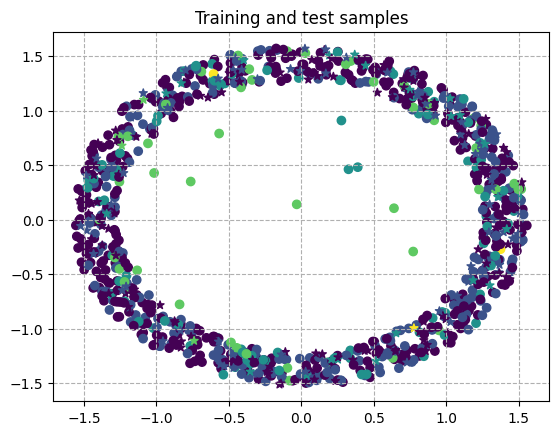

In [273]:
# select the first two features
X_train_reduced = X_train[:,3:5]
X_test_reduced = X_test[:,3:5]
print("Input shape reduced train: %s" %str(X_train_reduced.shape))
print("Input shape reduced test: %s" %str(X_test_reduced.shape))

plt.figure()
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train)
plt.scatter(X_test_reduced[:,0], X_test_reduced[:,1], c=y_test, marker="*")
plt.grid(linestyle="--")
plt.title("Training and test samples")

In [196]:
gen_model = GaussianNB()
gen_model.fit(X_train_reduced, y_train)
y_pred = gen_model.predict(X_test_reduced)
acc = accuracy_score(y_pred, y_test)    
print("Accuracy %.3f" %acc)
print(classification_report(y_test, y_pred))



Accuracy 0.520
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       104
           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.52       200
   macro avg       0.10      0.20      0.14       200
weighted avg       0.27      0.52      0.36       200



/home/mf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.505
[0.66159696 0.25225225 0.         0.         0.        ]


[Text(0.5, 0.875, 'X[15] <= -0.717\ngini = 0.625\nsamples = 849\nvalue = [434, 263, 100, 50, 2]'),
 Text(0.25, 0.625, 'X[24] <= -1.241\ngini = 0.524\nsamples = 223\nvalue = [140, 62, 11, 10, 0]'),
 Text(0.125, 0.375, 'X[6] <= 0.093\ngini = 0.592\nsamples = 25\nvalue = [7, 14, 3, 1, 0]'),
 Text(0.0625, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [0, 10, 0, 1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.622\nsamples = 14\nvalue = [7, 4, 3, 0, 0]'),
 Text(0.375, 0.375, 'X[23] <= -1.441\ngini = 0.486\nsamples = 198\nvalue = [133, 48, 8, 9, 0]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 10\nvalue = [3, 7, 0, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.47\nsamples = 188\nvalue = [130, 41, 8, 9, 0]'),
 Text(0.75, 0.625, 'X[3] <= -1.427\ngini = 0.652\nsamples = 626\nvalue = [294, 201, 89, 40, 2]'),
 Text(0.625, 0.375, 'X[1] <= 1.679\ngini = 0.255\nsamples = 28\nvalue = [24, 2, 2, 0, 0]'),
 Text(0.5625, 0.125, 'gini = 0.145\nsamples = 26\nvalue = [24, 1, 1, 0, 0]'),
 Text(0.6875, 0.125, 'gini = 0.5\ns

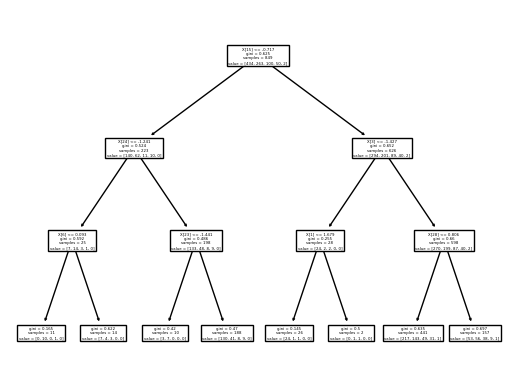

In [186]:
classifier=DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
acc = accuracy_score(y_pred, y_test)    
print("Accuracy %.3f" %acc)
print(sklearn.metrics.f1_score(y_test, y_pred,average=None))
tree.plot_tree(classifier)


In [330]:
classifier=RandomForestClassifier(max_depth=3)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
acc = accuracy_score(y_pred, y_test)    
print("Accuracy %.3f" %acc)
print(sklearn.metrics.f1_score(y_test, y_pred,average=None))

Accuracy 0.520
[0.68421053 0.         0.         0.         0.        ]


Accuracy 0.515
[0.66911765 0.24       0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.54      0.88      0.67       104
           1       0.40      0.17      0.24        70
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.52       200
   macro avg       0.19      0.21      0.18       200
weighted avg       0.42      0.52      0.43       200



/home/mf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


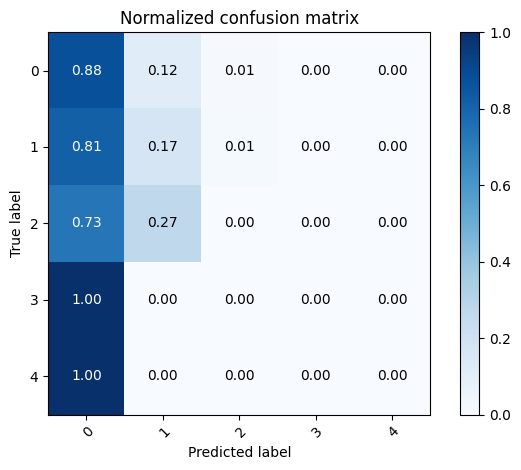

In [185]:
#classifier=svm.SVC(C=1,kernel='rbf',gamma=0.057,class_weight='balanced')
classifier=svm.SVC(C=1.3,kernel='poly',degree=5,gamma=0.02857142857142857,class_weight='balanced')
#classifier=svm.SVC(C=1,kernel='poly',degree=4,gamma='scale',class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
acc = accuracy_score(y_pred, y_test)    
print("Accuracy %.3f" %acc)
print(sklearn.metrics.f1_score(y_test, y_pred,average=None))
plot_confusion_matrix(y_test, y_pred,np.array([0,1,2,3,4]),normalize=True)
print(classification_report(y_test, y_pred))


Ensemble of kernelized methods and simple methods with BOOSTING (trying to improve Aaccuracy)


In [306]:
classifier_name = 'D'
algorithm = 'SAMME' 
n_estimators=np.random.randint(5, 70, 5)

all_classifiers = {
    'G': [GaussianNB, 'Gaussian Naive Bayes'],
    'P': [Perceptron(), 'Perceptron'],
    'LR': [LogisticRegression, 'Logistic Regression'],
    'D': [DecisionTreeClassifier, 'Decision Tree'],
    'S': [svm.SVC, 'SVM']     
    }

#print(sklearn.utils.class_weight.compute_class_weight(class_weight='balanced', classes=np.array([0,1,2,3,4]), y=y))

boosting_params = {
  'learning_rate': np.random.uniform(size=5),
  'n_estimators': n_estimators,
  }

Accuracy on train_set: 0.561 Accuracy on test_set: 0.505
f1-score:  [0.64092664 0.31578947 0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.54      0.80      0.64       104
           1       0.41      0.26      0.32        70
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.51       200
   macro avg       0.19      0.21      0.19       200
weighted avg       0.42      0.51      0.44       200



/home/mf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

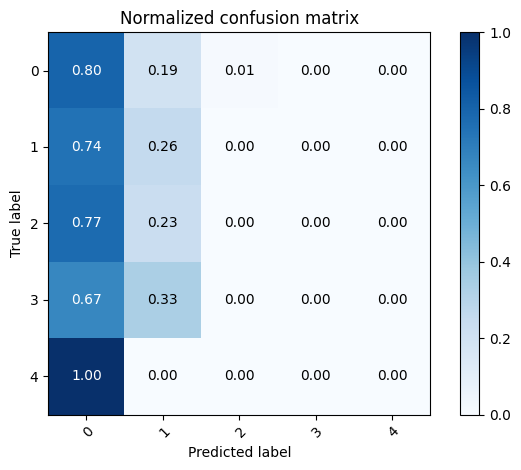

In [191]:

adaboost_classifier = AdaBoostClassifier(
    base_estimator=all_classifiers[classifier_name][0](max_depth=2),    
    n_estimators=29, 
    learning_rate=0.3, 
    algorithm= algorithm, 
    random_state=random_state
    ).fit(X_train, y_train)

y_pred=adaboost_classifier.predict(X_test)
ada_accuracy_train = adaboost_classifier.score(X_train, y_train)  
ada_accuracy_test = adaboost_classifier.score(X_test,y_test)
print("Accuracy on train_set: %.3f" %ada_accuracy_train,"Accuracy on test_set: %.3f" %ada_accuracy_test)
print("f1-score: ",sklearn.metrics.f1_score(y_test, y_pred,average=None))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred,np.array([0,1,2,3,4]),normalize=True)

In [314]:
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
#print(sklearn.metrics.get_scorer_names())
grid_search_boosting = GridSearchCV(
    adaboost_classifier,
    boosting_params, 
    scoring='f1_weighted',   #accuracy,f1_micro,f1_macro,balanced_accuracy,f1_weighted
    cv=cv, 
    return_train_score=False,
    verbose=0,
    
)
grid_search_boosting.fit(X_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for boosting classifier: %r" %grid_search_boosting.best_params_)
print("Best accuracy: %.4f" %grid_search_boosting.best_score_)
print("Boosting Accuracy over the test set: %.4f" %grid_search_boosting.score(X_test, y_test))

Best classification hyper-parameters for boosting classifier: {'learning_rate': 0.985202797136116, 'n_estimators': 43}
Best accuracy: 0.4302
Boosting Accuracy over the test set: 0.4182


Bagging

Accuracy on train_set: 0.673 Accuracy on test_set: 0.520
[0.66666667 0.3539823  0.23255814 0.22222222 0.        ]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

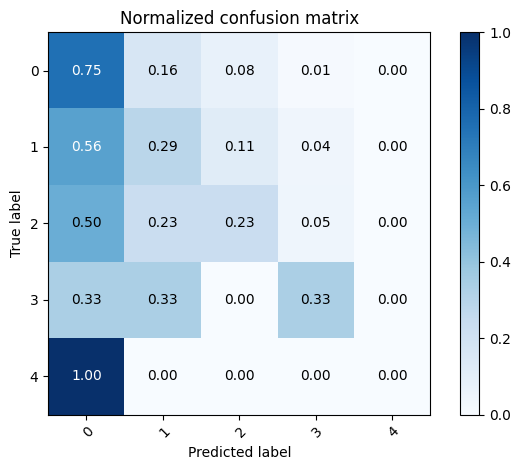

In [310]:
bagging_params = {
  'max_samples': np.random.randint(5,int(len(X_train)/2), 5),
  'n_estimators': n_estimators,
}
bagging_classifier = BaggingClassifier(
    base_estimator=all_classifiers['S'][0](C=0.5,kernel='poly',degree=2,gamma='scale',class_weight='balanced'), #best C=0.5 deg=2 
    max_samples=360, 
    n_estimators=60,                
    random_state=random_state,
    ).fit(X_train,y_train)

y_pred=bagging_classifier.predict(X_test)
bagging_accuracy_test = bagging_classifier.score(X_test, y_test)
bagging_accuracy_train = bagging_classifier.score(X_train, y_train)  
print("Accuracy on train_set: %.3f" %bagging_accuracy_train,"Accuracy on test_set: %.3f" %bagging_accuracy_test)
print(sklearn.metrics.f1_score(y_test, y_pred,average=None))
plot_confusion_matrix(y_test, y_pred,np.array([0,1,2,3,4]),normalize=True)



In [313]:
grid_search_bagging = GridSearchCV(
    bagging_classifier,
    bagging_params, 
    scoring='f1_weighted', 
    cv=cv, 
    return_train_score=False,
    # change max_features
    verbose=0
)
grid_search_bagging.fit(X_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for bagging classifier: %r" %grid_search_bagging.best_params_)
print("Best accuracy: %.4f" %grid_search_bagging.best_score_)
print("Bagging Accuracy over the test set: %.4f" %grid_search_bagging.score(X_test, y_test))

Best classification hyper-parameters for bagging classifier: {'max_samples': 384, 'n_estimators': 27}
Best accuracy: 0.4435
Bagging Accuracy over the test set: 0.4326


REGRESSION


In [258]:
import smogn

target_classification = "num_collisions"
target_regression = "min_CPA"


data=pd.read_csv("train_set.tsv",sep='\t',header=0)
data.drop(target_classification, inplace=True, axis=1)

random_state=10



smogn = smogn.smoter(

    data = data,
    y = target_regression,
    k=5,
    pert = 0.8,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    rel_thres = 0.10,        
    rel_method = 'auto',    
)


X=smogn.iloc[:,:-1]
Stdscaler = preprocessing.StandardScaler().fit(X)
X= Stdscaler.transform(X)
y_reg=smogn[target_regression]
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2,random_state=random_state) 


/home/mf/.local/lib/python3.8/site-packages/smogn/smoter.py:200: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  b_index.update({i: y_sort[bumps[i]:bumps[i + 1]]})
r_index: 100%|##########| 170/170 [00:00<00:00, 210.60it/s]


In [267]:
model_type = "poly_svm" 

if model_type == "linear_regression":
  model = linear_model.LinearRegression()
  model.fit(X_train, y_train)

elif model_type == "linear_svm":
  model = svm.SVR(kernel='linear', C=1.9)
  model.fit(X_train, y_train)

elif model_type == "poly_svm":
  model = svm.SVR(kernel='poly', C=1.9, degree=1, gamma='scale')
  model.fit(X_train, y_train)


In [269]:
y_pred = model.predict(X_test)

print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))

print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 159151184.26
Variance score: -0.01


In [251]:
grid_search_regression = GridSearchCV(model,
                           {
                              'C':np.arange(0.1,2,0.1),                            
                            'degree': np.arange(1,7,1),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
print("\n\nGrid Search for reg\n\n")
print(grid_search_regression.fit(X_train,y_train))
print(grid_search_regression.best_params_)



Grid Search for reg


Fitting 5 folds for each of 114 candidates, totalling 570 fits
GridSearchCV(cv=5, estimator=SVR(C=1.9, degree=1, kernel='poly'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'degree': array([1, 2, 3, 4, 5, 6])},
             scoring='r2', verbose=1)
{'C': 1.9000000000000001, 'degree': 1}


In [284]:
#estimator=svm.SVR(C=0.5,kernel='poly',degree=2,gamma='scale')
estimator=linear_model.LinearRegression()

n_estimators=np.random.randint(5, 70, 5)
adaboost_regressor = AdaBoostRegressor(
    base_estimator=estimator,     
    n_estimators=17,    
    learning_rate=0.19, 
    random_state=random_state
    ).fit(X_train, y_train)

y_pred=adaboost_regressor.predict(X_test)
ada_accuracy_train = adaboost_regressor.score(X_train, y_train)  
ada_accuracy_test = adaboost_regressor.score(X_test,y_test)
print("r2 on train_set: %.3f" %ada_accuracy_train,"r2 on test_set: %.3f" %ada_accuracy_test)


r2 on train_set: 0.078 r2 on test_set: 0.040


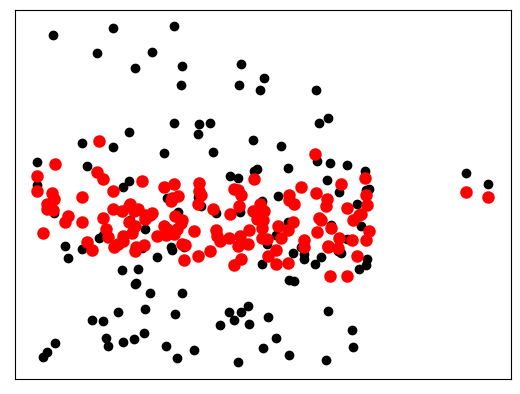

In [282]:
X_train_plot=X_train[:, np.newaxis, 7]
X_test_plot=X_test[:,np.newaxis,7]
y_pred=adaboost_regressor.predict(X_test)
plt.scatter(X_test_plot, y_test,  color='black')
plt.scatter(X_test_plot, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()


In [260]:
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
boosting_params = {
  'learning_rate': np.random.uniform(size=5),
  'n_estimators': n_estimators,
  }
#print(sklearn.metrics.get_scorer_names())
grid_search_boosting = GridSearchCV(
    adaboost_regressor,
    boosting_params, 
    scoring='r2',   
    cv=cv, 
    return_train_score=False,
    verbose=0,
    
)
grid_search_boosting.fit(X_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for boosting regressor: %r" %grid_search_boosting.best_params_)
print("Best r2: %.4f" %grid_search_boosting.best_score_)
print("Boosting r2 over the test set: %.4f" %grid_search_boosting.score(X_test, y_test))

Best classification hyper-parameters for boosting regressor: {'learning_rate': 0.1964673923958522, 'n_estimators': 17}
Best r2: -0.0952
Boosting r2 over the test set: 0.0432


In [262]:
bagging_params = {
  'max_samples': np.random.randint(5,int(len(X_train)/2), 5),
  'n_estimators': n_estimators,
}
bagging_regressor = BaggingRegressor(
    base_estimator=estimator,
    max_samples=70, 
    n_estimators=62,                
    random_state=random_state,
    ).fit(X_train,y_train)

y_pred=bagging_regressor.predict(X_test)
bagging_accuracy_test = bagging_regressor.score(X_test, y_test)
bagging_accuracy_train = bagging_regressor.score(X_train, y_train)  
print("score on train_set: %.3f" %bagging_accuracy_train,"score on test_set: %.3f" %bagging_accuracy_test)


score on train_set: 0.075 score on test_set: 0.027


In [263]:
#print(sklearn.metrics.get_scorer_names())
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
grid_search_bagging = GridSearchCV(
    bagging_regressor,
    bagging_params, 
    scoring='r2', 
    cv=cv, 
    return_train_score=False,
    verbose=0
)
grid_search_bagging.fit(X_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for bagging classifier: %r" %grid_search_bagging.best_params_)
print("Best r2: %.4f" %grid_search_bagging.best_score_)
print("Bagging r2 over the test set: %.4f" %grid_search_bagging.score(X_test, y_test))

Best classification hyper-parameters for bagging classifier: {'max_samples': 229, 'n_estimators': 6}
Best r2: -0.0593
Bagging r2 over the test set: -0.0063
